# Chapter 7 In-chapter examples

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

### Fig 7.2: What to look for in visual inspection of data

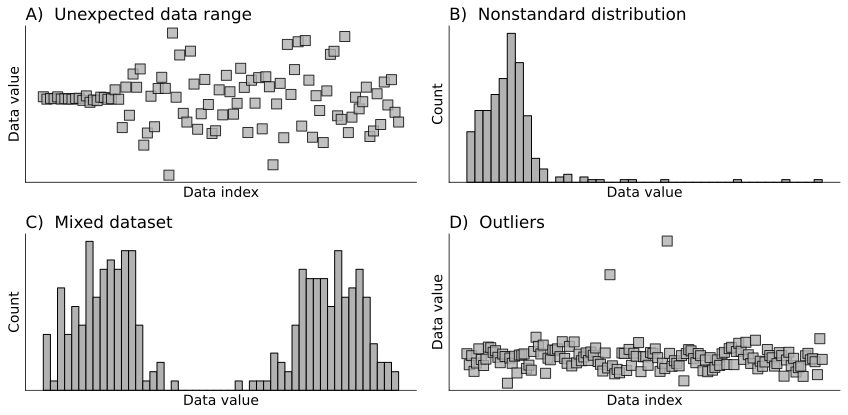

In [3]:
# plot
_,axs = plt.subplots(2,2,figsize=(12,6))

# panel A: unexpected range
x = np.concatenate((np.random.randn(20),np.random.randn(80)*30),axis=0)
axs[0,0].plot(x,'ks',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.8)
axs[0,0].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[0,0].set_title(r'A)  Unexpected data range')

# panel B: distribution shape
x = np.concatenate((5+np.random.randn(150),np.exp(1+np.random.randn(150))),axis=0)
axs[0,1].hist(x,bins='fd',edgecolor='k',facecolor=(.7,.7,.7))
axs[0,1].set(xlabel='Data value',xticks=[],yticks=[],ylabel='Count')
axs[0,1].set_title(r'B)  Nonstandard distribution')

# panel C: mixed datasets
x = np.concatenate((4+np.random.randn(150),np.random.randn(150)-4),axis=0)
axs[1,0].hist(x,bins=50,edgecolor='k',facecolor=(.7,.7,.7))
axs[1,0].set(xlabel='Data value',xticks=[],yticks=[],ylabel='Count')
axs[1,0].set_title(r'C)  Mixed dataset')

# panel D: outliers
x = np.random.randn(150)
x[60] = 10
x[84] = 14
axs[1,1].plot(x,'ks',markersize=10,markerfacecolor=(.7,.7,.7),alpha=.8)
axs[1,1].set(xlabel='Data index',xticks=[],yticks=[],ylabel='Data value')
axs[1,1].set_title(r'D)  Outliers')

# show figure
plt.tight_layout()
plt.show()

### Fig 7.3: Example of dataset with outliers

In [4]:
# Create normally distributed data
N = 100
data = np.random.randn(N)

In [5]:
# and add two random outliers in random positions
data[np.random.choice(np.arange(N),2)] = np.random.uniform(2,3,2)**2

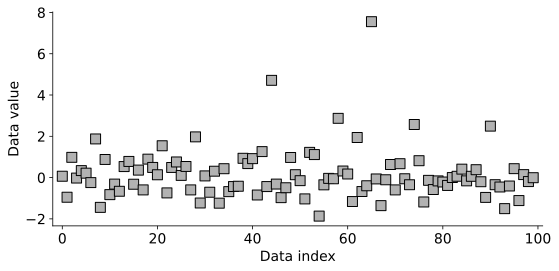

In [6]:
# plot
plt.figure(figsize=(8,4))
plt.plot(data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
plt.xlim([-2,N+1])
plt.xlabel('Data index')
plt.ylabel('Data value')

# show figure
plt.tight_layout()
plt.show()

### Fig 7.5: Z-score method for identifying outliers

In [7]:
# outlier threshold
zThreshold = 3.29

In [8]:
# create some raw data
N = 135
data = np.exp(np.random.randn(N)/2) + 5

In [9]:
# zscore the data
dataZ = (data-np.mean(data)) / np.std(data,ddof=1)

In [10]:
# identify data indices containing outliers
outliers = np.where(np.abs(dataZ)>zThreshold)[0]


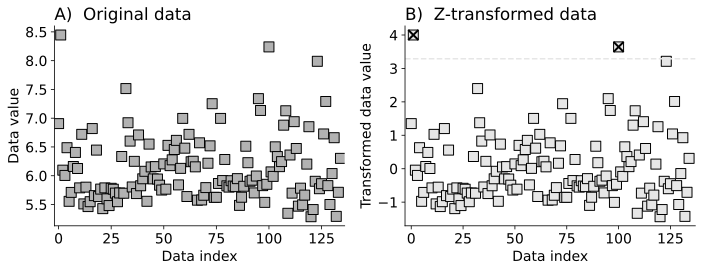

In [11]:
# plot
_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xlim=[-2,N+1],xlabel='Data index',ylabel='Data value')
axs[0].set_title(r'A)  Original data')


axs[1].plot(dataZ,'ks',markersize=10,markerfacecolor=(.9,.9,.9))
axs[1].axhline(zThreshold,linestyle='--',color=(.9,.9,.9))
axs[1].plot(outliers,dataZ[outliers],'kx',markersize=10,markeredgewidth=2)
axs[1].set(xlim=[-3,N+2],xlabel='Data index',ylabel='Transformed data value')
axs[1].set_title(r'B)  Z-transformed data')

# show figure
plt.tight_layout()
plt.show()

### Fig 7.6: Impact of removing outliers on z-values

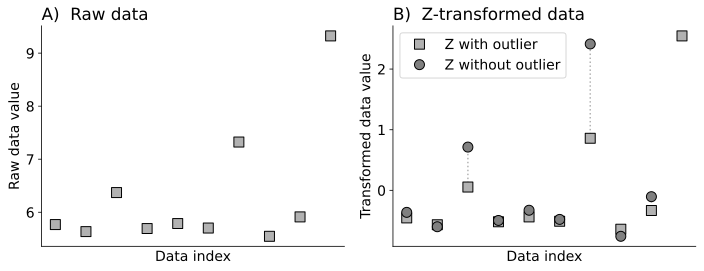

In [6]:
# create some raw data
N = 10 # sample size
data = np.exp(np.random.randn(N)/2) + 5
data[-1] = np.max(data)+2 # impose an outlier (at the end for convenience)
xvals = np.arange(N)

dataZ1 = (data-np.mean(data)) / np.std(data,ddof=1)
dataZ2 = (data[:-1]-np.mean(data[:-1])) / np.std(data[:-1],ddof=1)

_,axs = plt.subplots(1,2,figsize=(10,4))
axs[0].plot(xvals,data,'ks',markersize=10,markerfacecolor=(.7,.7,.7))
axs[0].set(xticks=[],xlabel='Data index',ylabel='Raw data value')
axs[0].set_title(r'A)  Raw data')

axs[1].plot(xvals,dataZ1,'ks',markersize=10,markerfacecolor=(.7,.7,.7),label='Z with outlier')
axs[1].plot(xvals[:-1],dataZ2,'ko',markersize=10,markerfacecolor=(.5,.5,.5),label='Z without outlier')
axs[1].set(xticks=[],xlabel='Data index',ylabel='Transformed data value')
axs[1].legend()
axs[1].set_title(r'B)  Z-transformed data')

# draw lines connection pre/post-removal values
for d,z,x in zip(dataZ1[:-1],dataZ2,xvals[:-1]):
  axs[1].plot([x,x],[d,z],':',color=(.7,.7,.7),zorder=-10)

# show figure
plt.tight_layout()
plt.show()

### Fig 7.8: Data trimming

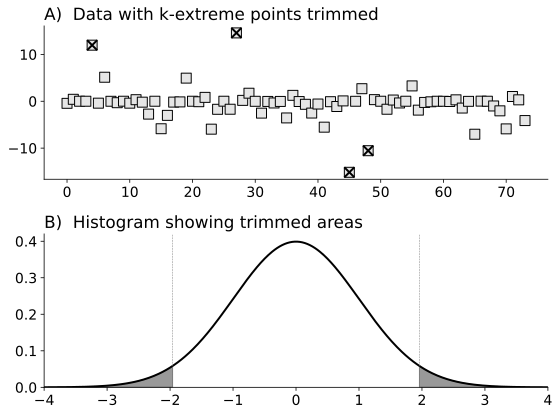

In [8]:
N = 74
data = np.random.randn(N)**3

# find largest and smallest values
k = 2
sortidx = np.argsort(data)
minvals = sortidx[:k]
maxvals = sortidx[-k:]

_,axs = plt.subplots(2,1,figsize=(8,6))
axs[0].plot(data,'ks',markersize=10,markerfacecolor=(.9,.9,.9))
axs[0].plot(minvals,data[minvals],'kx',markersize=10,markeredgewidth=2)
axs[0].plot(maxvals,data[maxvals],'kx',markersize=10,markeredgewidth=2)
axs[0].set_title(r'A)  Data with k-extreme points trimmed')


# create a Gaussian probability curve for the panel B
x = np.linspace(-4,4,401)
gpdf = stats.norm.pdf(x)

# the find the indices of the 2.5% and 97.5%
lbndi = np.argmin(np.abs(x-stats.norm.ppf(.025))) # lbndi = Lower BouND Index
ubndi = np.argmin(np.abs(x-stats.norm.ppf(1-.025)))


# plot the probability function and the vertical lines
axs[1].plot(x,gpdf,'k',linewidth=2)
axs[1].axvline(x[lbndi],color=(.5,.5,.5),linewidth=.5,linestyle='--')
axs[1].axvline(x[ubndi],color=(.5,.5,.5),linewidth=.5,linestyle='--')
axs[1].set(xlim=x[[0,-1]],ylim=[0,.42])
axs[1].set_title(r'B)  Histogram showing trimmed areas')

# now create patches for the rejected area
axs[1].fill_between(x[:lbndi+1],gpdf[:lbndi+1],color='k',alpha=.4)
axs[1].fill_between(x[ubndi:],gpdf[ubndi:],color='k',alpha=.4)


# show figure
plt.tight_layout()
plt.show()